# Week 14: Data Pre-Processing & Regression - Student Assignments

## Overview
This document contains practical tasks, assignments, and assessments designed to test your understanding of data preprocessing techniques and regression analysis covered in Week 14.

## Part 1: Tasks

### Task 1: Missing Data Management
**Objective**: Practice handling missing values in datasets

**Dataset**: `Task-Datasets/task1_data_with_missing.csv`

**Instructions**:
1. Load the provided dataset (15 rows with Name, Age, City, Income, Product_Rating)
2. The dataset already contains missing values
3. Handle the missing values using:
   - Mean imputation
   - Mode imputation
4. Document your approach


In [116]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset

taskData = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Task-Datasets\task1_data_with_missing.csv")

# print the first 5 rows
taskData.head()

,Name,Age,City,Income,Product_Rating
0,John,25.0,New York,45000.0,4.5
1,Sarah,32.0,Los Angeles,62000.0,4.8
2,Mike,NaN,Chicago,55000.0,4.2
3,Emily,28.0,Houston,NaN,4.7
4,David,45.0,Phoenix,78000.0,NaN


In [7]:
# check the summary statistics of the data

taskData.describe(include='all')

,Name,Age,City,Income,Product_Rating
count,15,12.000000,14,12.000000,13.000000
unique,15,NaN,14,NaN,NaN
top,John,NaN,New York,NaN,NaN
freq,1,NaN,1,NaN,NaN
mean,NaN,34.000000,NaN,61416.666667,4.515385
std,NaN,6.687845,NaN,10849.870827,0.260916
min,NaN,25.000000,NaN,45000.000000,4.100000
25%,NaN,28.750000,NaN,54000.000000,4.300000
50%,NaN,32.500000,NaN,60500.000000,4.500000
75%,NaN,38.750000,NaN,69750.000000,4.700000


In [5]:
# check the data information

taskData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            15 non-null     object 
 1   Age             12 non-null     float64
 2   City            14 non-null     object 
 3   Income          12 non-null     float64
 4   Product_Rating  13 non-null     float64
dtypes: float64(3), object(2)
memory usage: 732.0+ bytes


- It is observed that the **Age** column has 3 missing values, **City** has 1 missing value, **Income** has 3 missing values, and **Product_rating** has 2 missing values

## Handling Missing Values

- Since the features having missing values comprise of both numerical and categorical variables, we choose to fill the numerical variables with its mean and the categorical variable with its mode

In [10]:
# import the library to handle missing values
from sklearn.impute import SimpleImputer

# create an imputer object with a mean filling strategy
num_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
# fit the imputer object to the numerical columns (2nd, 4th, and 5th columns) and transform the data
taskData.iloc[:, [1,3,4]] = num_imputer.fit_transform(taskData.iloc[:, [1,3,4]])

In [11]:
# verify that there are no missing values in the numerical columns

taskData

,Name,Age,City,Income,Product_Rating
0,John,25.0,New York,45000.000000,4.500000
1,Sarah,32.0,Los Angeles,62000.000000,4.800000
2,Mike,34.0,Chicago,55000.000000,4.200000
3,Emily,28.0,Houston,61416.666667,4.700000
4,David,45.0,Phoenix,78000.000000,4.515385
5,Lisa,35.0,NaN,67000.000000,4.600000
6,Tom,29.0,Philadelphia,51000.000000,4.300000
7,Anna,34.0,San Antonio,59000.000000,4.900000
8,Chris,41.0,San Diego,72000.000000,4.100000
9,Jessica,33.0,Dallas,61416.666667,4.800000


In [15]:
# import the library to handle missing values
from sklearn.impute import SimpleImputer

# create an imputer object with a mode filling strategy
cat_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
# fit the imputer object to the categorical column (3rd column) and transform the data
taskData.iloc[:, 2] = cat_imputer.fit_transform(taskData.iloc[:, 2].values.reshape(-1,1))

In [16]:
taskData.iloc[:, 2]

0          New York
1       Los Angeles
2           Chicago
3           Houston
4           Phoenix
5            Austin
6      Philadelphia
7       San Antonio
8         San Diego
9            Dallas
10         San Jose
11           Austin
12     Jacksonville
13    San Francisco
14     Indianapolis
Name: City, dtype: object

## Approach to Task 1

#### Library Importation

Understanding the nature of the task I want to solve, I began by importing the basic libraries: numpy, pandas and matplotlib.

#### Dataset

The dataset to be used for the tasks has 15 records (rows) and 5 features (column). Out of the 5 features, three (`Age, Income and Product_Rating`) are numerical in nature while `City` is categorical and `Name` is string.

Inspecting the dataset by using the `.info()` method, I observed that four (three numerical and 1 categorical) columns has missing values.

#### Handling Missing Values

There are multiple ways to address missing values in a dataset which could include any of the following: dropping them, filling with a constant, forward and backward filling or filling with a statistic. For the purpose of this task, we would be filling with the mean and mode which are the best statistical measure for numerical and categorical variables respectively.

I imported the `SimpleImputer` class from the `sklearn.impute` module, I then created two imputer objects, one for the numerical features and another for the categorical feature.

I specified the stratagy argument for the numerical and categorical feature as `mean` and `most_frequent` respectively. I then fitted the object on the specific columns

#### Conclusion

I verified that the imputation was done accurately by viewing the dataset

### Task 2: Encoding Categorical Variables
**Objective**: Master encoding techniques for categorical data

**Dataset**: `Task-Datasets/task2_categorical_data.csv`

**Instructions**:
1. Load the provided dataset with:
   - Categorical independent variables: City, Product_Type
   - Categorical dependent variable: Purchased (Yes/No)
   - Numerical features: Age, Purchase_Amount
2. Apply OneHotEncoder to City and Product_Type
3. Apply LabelEncoder to the Purchased variable
4. Print the shapes and first 5 rows before and after encoding


In [17]:
# Load the dataset

task2Data = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Task-Datasets\task2_categorical_data.csv")

# print the first 5 rows
task2Data.head()

,CustomerID,City,Product_Type,Age,Purchase_Amount,Purchased
0,C001,Mumbai,Electronics,28,15000,Yes
1,C002,Delhi,Clothing,35,3500,No
2,C003,Bangalore,Electronics,42,22000,Yes
3,C004,Mumbai,Furniture,29,8500,No
4,C005,Chennai,Electronics,31,18000,Yes


In [18]:
# Check the dataset information

task2Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       20 non-null     object
 1   City             20 non-null     object
 2   Product_Type     20 non-null     object
 3   Age              20 non-null     int64 
 4   Purchase_Amount  20 non-null     int64 
 5   Purchased        20 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [42]:
# split the data into features and target variable
X = task2Data.iloc[:, :-1].values
Y = task2Data.iloc[:, -1].values

In [ ]:
# Encoding Categorical Features

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# create a column transformer with one-hot encoding for categorical features
ct = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), [1,2])], remainder="passthrough")

# fit and transform the features
X_encod = np.array(ct.fit_transform(X))

In [50]:
# Encoding the Target Variable

from sklearn.preprocessing import LabelEncoder

# create a label encoder object
label_encoder = LabelEncoder()

# fit and transform the target variable
Y_encod = label_encoder.fit_transform(Y)

In [55]:
# print the shapes of X and Y before encoding

print("Shape of X before encoding:", X.shape)
print("Shape of Y before encoding:", Y.shape)
print("---------------------------------")
# print the shape of the encoded features and target variable
print("Shape of X after encoding", X_encod.shape)
print("Shape of Y after encoding", Y_encod.shape)

Shape of X before encoding: (20, 5)
Shape of Y before encoding: (20,)
---------------------------------
Shape of X after encoding (20, 10)
Shape of Y after encoding (20,)


In [57]:
# print the first 5 rows of X and Y before encoding
print(X[:5])
print("-------------------------")
print(Y[:5])

[['C001' 'Mumbai' 'Electronics' 28 15000]
 ['C002' 'Delhi' 'Clothing' 35 3500]
 ['C003' 'Bangalore' 'Electronics' 42 22000]
 ['C004' 'Mumbai' 'Furniture' 29 8500]
 ['C005' 'Chennai' 'Electronics' 31 18000]]
-------------------------
['Yes' 'No' 'Yes' 'No' 'Yes']


In [58]:
# print the first 5 rows of X and Y after encoding
print(X_encod[:5])
print("-------------------------")
print(Y_encod[:5])

[[0.0 0.0 0.0 1.0 0.0 1.0 0.0 'C001' 28 15000]
 [0.0 0.0 1.0 0.0 1.0 0.0 0.0 'C002' 35 3500]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 'C003' 42 22000]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 'C004' 29 8500]
 [0.0 1.0 0.0 0.0 0.0 1.0 0.0 'C005' 31 18000]]
-------------------------
[1 0 1 0 1]


### Task 3: Feature Scaling Comparison
**Objective**: Understand the impact of feature scaling

**Dataset**: `Task-Datasets/task3_scaling_data.csv`

**Instructions**:
1. Load the provided dataset with features on different scales:
   - Age: 23-46
   - Annual_Salary: 32,000-108,000
   - Years_Experience: 1-23
   - Performance_Score: 71-95
2. Split the data into training and test sets (80/20)
3. Apply `StandardScaler` to both sets
4. Create visualizations showing:
   - Original data distribution
   - Scaled data distribution
5. Calculate and display the mean and standard deviation before and after scaling

In [59]:
# Load the dataset

task3Data = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Task-Datasets\task3_scaling_data.csv")

# print the first 5 rows of the data
task3Data.head()

,EmployeeID,Age,Annual_Salary,Years_Experience,Performance_Score
0,E001,23,32000,1,72
1,E002,28,45000,4,78
2,E003,35,68000,10,85
3,E004,42,95000,18,92
4,E005,29,48000,5,76


In [60]:
# check the basic summary statistics of the data
task3Data.describe()

,Age,Annual_Salary,Years_Experience,Performance_Score
count,25.000000,25.000000,25.000000,25.000000
mean,34.280000,66920.000000,10.480000,83.480000
std,7.009042,23806.371696,6.964912,7.544976
min,23.000000,32000.000000,1.000000,71.000000
25%,29.000000,48000.000000,5.000000,77.000000
50%,34.000000,65000.000000,10.000000,84.000000
75%,40.000000,88000.000000,16.000000,90.000000
max,46.000000,108000.000000,23.000000,95.000000


In [64]:
# split the dataset into features and target variable

X = task3Data.iloc[:,1:-1].values
Y = task3Data.iloc[:,-1].values

In [68]:
# splitting the dataset into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [69]:
# Applying StandardScaler to both sets

from sklearn.preprocessing import StandardScaler

# create the StandardScaler object
scaler = StandardScaler()

# fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# transform the test set
X_test_scaled = scaler.transform(X_test)

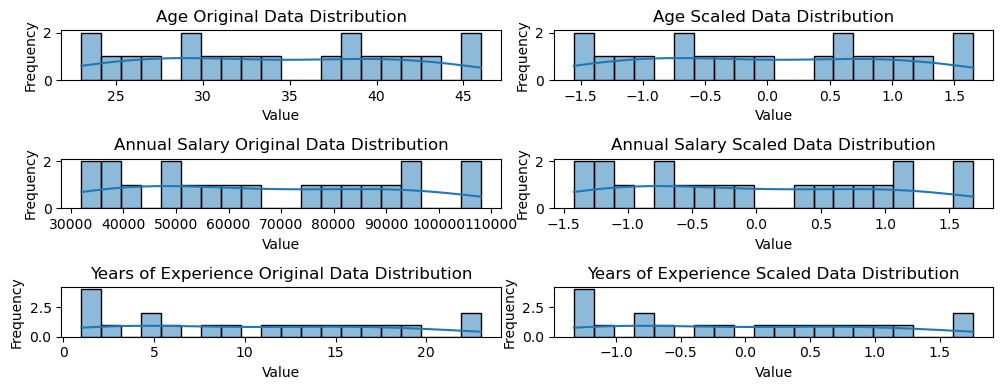

In [119]:
# plot the distribution of the scaled and original data

# import the matplotlib library
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots 
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 4))

# Plot the Age original data on the first row, first column
sns.histplot(X_train[:,0], bins=20, kde=True, ax=ax[0,0])
ax[0,0].set_title('Age Original Data Distribution')
ax[0,0].set_xlabel('Value')
ax[0,0].set_ylabel('Frequency')


# Plot the Age Scaled data on the first row, second column
sns.histplot(X_train_scaled[:,0], bins=20, kde=True,ax=ax[0,1])
ax[0,1].set_title('Age Scaled Data Distribution')
ax[0,1].set_xlabel('Value')
ax[0,1].set_ylabel('Frequency')


# Plot the Annual Salary original data on the second row, first column
sns.histplot(X_train[:,1], bins=20, kde=True, ax=ax[1,0])
ax[1,0].set_title('Annual Salary Original Data Distribution')
ax[1,0].set_xlabel('Value')
ax[1,0].set_ylabel('Frequency')


# Plot the Annual Salary Scaled data on the second row, second column
sns.histplot(X_train_scaled[:,1], bins=20, kde=True,ax=ax[1,1])
ax[1,1].set_title('Annual Salary Scaled Data Distribution')
ax[1,1].set_xlabel('Value')
ax[1,1].set_ylabel('Frequency')


# Plot the Years_Experience original data on the third row, first column
sns.histplot(X_train[:,2], bins=20, kde=True, ax=ax[2,0])
ax[2,0].set_title('Years of Experience Original Data Distribution')
ax[2,0].set_xlabel('Value')
ax[2,0].set_ylabel('Frequency')


# Plot the Years_Experience Scaled data on the third row, second column
sns.histplot(X_train_scaled[:,2], bins=20, kde=True,ax=ax[2,1])
ax[2,1].set_title('Years of Experience Scaled Data Distribution')
ax[2,1].set_xlabel('Value')
ax[2,1].set_ylabel('Frequency')




# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [85]:
# Set options to suppress scientific notation
np.set_printoptions(suppress=True)

# print the mean and standard deviation of the original data
print(f"The mean of each feature of the original data are: {np.mean(X_train, axis=0)}")
print(f"The standard deviation of each feature of the original data are: {np.std(X_train, axis=0)}")

The mean of each feature of the original data are: [   34.15 66750.      10.45]
The standard deviation of each feature of the original data are: [    7.178266 24480.349262     7.130743]


C:\Users\USER\AppData\Local\Temp\ipykernel_22432\678753264.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train, bins=20)


<Axes: ylabel='Density'>

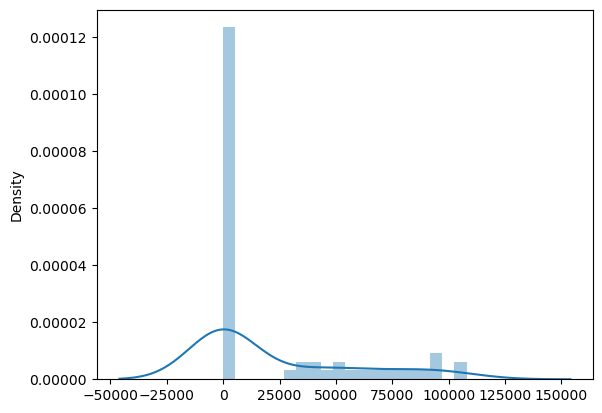

In [105]:
import seaborn as sns

sns.displot(X_train, bins=20)

In [86]:
# print the mean and standard deviation of the scaled data
print(f"The mean of each feature of the scaled data are: {np.mean(X_train_scaled, axis=0)}")
print(f"The standard deviation of each feature of the scaled data are: {np.std(X_train_scaled, axis=0)}")

The mean of each feature of the scaled data are: [ 0. -0.  0.]
The standard deviation of each feature of the scaled data are: [1. 1. 1.]


## Part 2: Assignments

### Assignment 1: Complete Data Preprocessing Pipeline
**Objective**: Build an end-to-end preprocessing workflow

**Scenario**: You have been provided with a messy customer dataset for an e-commerce company. The dataset contains information about customers including demographics, purchase history, and whether they made a repeat purchase.

**Dataset**: `Assignment-Datasets/assignment1_ecommerce_data.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Tasks**:
1. **Data Loading & Exploration**:
   - Load the dataset
   - Display basic information (shape, data types, missing values count)
   - Show statistical summary

2. **Handle Missing Data**:
   - Identify columns with missing values
   - Apply appropriate imputation strategy
   - Justify your choice of strategy

3. **Encode Categorical Variables**:
   - Encode using OneHotEncoder
   - Encode LabelEncoder
   - Handle the dummy variable trap

4. **Split Dataset**:
   - Create training and test sets (70/30 split)
   - Set random_state=42 for reproducibility

5. **Feature Scaling**:
   - Apply StandardScaler to numerical features
   - Ensure proper fit/transform methodology

6. **Validation**:
   - Print shapes of all final arrays
   - Verify no missing values remain
   - Display first 5 rows of processed training data

**Deliverable**: 
- Complete preprocessing pipeline
- Brief written report (markdown) explaining:
  - Your preprocessing decisions
  - Challenges encountered
  - Why you chose specific techniques


#####  Data Loading & Exploration

In [87]:
# Load the dataset

ecomData = pd.read_csv(r"C:\Users\USER\Desktop\DataraFlow Internship\GitHub Pushing\Week 14\Week-14-Take-Home\Assignment-Datasets\assignment1_ecommerce_data.csv")

# view the first 5 rows of the data
ecomData.head()

,CustomerID,Gender,Age,Country,Annual_Income,Purchase_Amount,Repeat_Customer
0,CUST001,Male,25.0,USA,45000.0,250,No
1,CUST002,Female,32.0,UK,62000.0,420,Yes
2,CUST003,Male,NaN,Canada,55000.0,310,No
3,CUST004,Female,28.0,USA,NaN,380,Yes
4,CUST005,Male,45.0,Australia,78000.0,550,Yes


In [88]:
#  Display the shape

ecomData.shape

(100, 7)

In [89]:
# Display the datatypes

ecomData.dtypes

CustomerID          object
Gender              object
Age                float64
Country             object
Annual_Income      float64
Purchase_Amount      int64
Repeat_Customer     object
dtype: object

In [90]:
# Display the missing values in each column

ecomData.isnull().sum()

CustomerID          0
Gender              0
Age                 4
Country            14
Annual_Income      10
Purchase_Amount     0
Repeat_Customer     0
dtype: int64

In [91]:
# show statistical summary

ecomData.describe()

,Age,Annual_Income,Purchase_Amount
count,96.00000,90.000000,100.000000
mean,35.09375,64377.777778,419.900000
std,6.02290,10863.378101,95.911312
min,25.00000,45000.000000,250.000000
25%,30.00000,55000.000000,338.750000
50%,35.00000,65500.000000,425.000000
75%,40.00000,74000.000000,500.000000
max,46.00000,81000.000000,575.000000


##### Handle Missing Data

In [95]:
# Display the columns with missing values
ecomData.columns[ecomData.isnull().any()]

Index(['Age', 'Country', 'Annual_Income'], dtype='object')

In [96]:
ecomData

,CustomerID,Gender,Age,Country,Annual_Income,Purchase_Amount,Repeat_Customer
0,CUST001,Male,25.0,USA,45000.0,250,No
1,CUST002,Female,32.0,UK,62000.0,420,Yes
2,CUST003,Male,NaN,Canada,55000.0,310,No
3,CUST004,Female,28.0,USA,NaN,380,Yes
4,CUST005,Male,45.0,Australia,78000.0,550,Yes
...,...,...,...,...,...,...,...
95,CUST096,Male,42.0,Canada,76000.0,540,Yes
96,CUST097,Female,29.0,USA,51000.0,305,No
97,CUST098,Male,38.0,Australia,NaN,475,Yes
98,CUST099,Female,33.0,UK,62000.0,400,Yes


In [ ]:
# Apply appropriate imputation strategy
from sklearn.impute import SimpleImputer

# Impute missing values on numerical columns
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ecomData[['Age', 'Annual_Income']] = num_imputer.fit_transform(ecomData[['Age', 'Annual_Income']])


In [ ]:
# Impute missing values on Country column
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
ecomData['Country'] = cat_imputer.fit_transform(ecomData['Country'])

In [103]:
ecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       100 non-null    object 
 1   Gender           100 non-null    object 
 2   Age              100 non-null    float64
 3   Country          86 non-null     object 
 4   Annual_Income    100 non-null    float64
 5   Purchase_Amount  100 non-null    int64  
 6   Repeat_Customer  100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [113]:
ecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       100 non-null    object 
 1   Gender           100 non-null    object 
 2   Age              100 non-null    float64
 3   Country          86 non-null     object 
 4   Annual_Income    100 non-null    float64
 5   Purchase_Amount  100 non-null    int64  
 6   Repeat_Customer  100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


### Assignment 2: Simple Linear Regression Analysis
**Objective**: Implement and evaluate a simple linear regression model

**Scenario**: A company wants to understand the relationship between advertising spend and sales revenue to optimize their marketing budget.

**Dataset**: `Assignment-Datasets/assignment2_advertising_sales.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Tasks**:
1. **Data Preparation**:
   - Load and explore the dataset
   - Check for any data quality issues
   - Create a scatter plot to visualize the relationship

2. **Model Building**:
   - Split data into training (70%) and test (30%) sets
   - Build a simple linear regression model
   - Fit the model on training data

3. **Predictions**:
   - Make predictions on both training and test sets
   - Compare predicted vs actual values (show first 10)

4. **Visualization**:
   - Create scatter plots with regression line for:
     - Training set results
     - Test set results
   - Ensure proper labels, titles, and legends

5. **Model Evaluation**:
   - Calculate R² score for both training and test sets
   - Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
   - Interpret what these metrics tell you about model performance

6. **Business Insights**:
   - What is the equation of the regression line?
   - If the company spends $50,000 on advertising, what sales revenue can they expect?
   - Provide 3 business recommendations based on your analysis

**Deliverable**:
- Complete analysis
- Visualizations
- Report (markdown) with:
  - Model performance metrics
  - Regression equation
  - Business insights and recommendations

### Assignment 3: Multiple Linear Regression with Feature Selection
**Objective**: Build a multiple regression model and optimize it using backward elimination

**Scenario**: A startup company wants to predict their monthly profit based on various business metrics. You need to build a model and identify which factors most significantly impact profit.

**Dataset**: `Assignment-Datasets/assignment3_startup_profit.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Tasks**:
1. **Data Preprocessing**:
   - Load and explore the dataset
   - Encode the categorical variable (Location)
   - Avoid the dummy variable trap
   - Split into training (80%) and test (20%) sets

2. **Initial Model**:
   - Build a multiple linear regression model using all features
   - Fit the model on training data
   - Make predictions on test set

3. **Model Evaluation (Initial)**:
   - Calculate R² score
   - Calculate adjusted R² score
   - Calculate MSE and RMSE

4. **Feature Selection using Backward Elimination**:
   - Add a column of ones for the intercept
   - Use statsmodels OLS to get p-values
   - Remove features with p-value > 0.05 iteratively
   - Document each step of elimination with justification

5. **Optimized Model**:
   - Rebuild the model with selected features only
   - Compare performance with initial model
   - Create a comparison table

6. **Visualization**:
   - Create a bar chart comparing actual vs predicted profits (top 10 samples)
   - Create a residual plot
   - Create a feature importance visualization

7. **Analysis Report**:
   - Which features were most significant?
   - How much did model performance improve after optimization?
   - What business recommendations can you provide?

**Deliverable**:
- Complete implementation
- Visualizations
- Comprehensive report (markdown) with:
  - Backward elimination steps documented
  - Model comparison table
  - Feature importance analysis
  - Business recommendations


## Part 3: Assessment

### Real-World Project: Housing Price Prediction

**Objective**: Apply all learned concepts in a complete machine learning project

**Scenario**: You are a data scientist at a real estate company. The company wants to develop a model to predict house prices based on various features to help with property valuation.

**Dataset**: `Assessment-Dataset/housing_price_data.csv`

**Dataset Description**:
- **Check Data Dictionary**

**Project Requirements**:

### Phase 1: Data Understanding & Preprocessing
1. Load and perform exploratory data analysis (EDA):
   - Dataset shape and structure
   - Statistical summaries
   - Distribution of target variable
   - Correlation analysis with heatmap

2. Data Quality Assessment:
   - Identify and handle missing values
   - Detect and handle outliers if any
   - Document all data quality observations

3. Complete Preprocessing Pipeline:
   - Encode categorical variables appropriately (Neighborhood, Garage, Pool)
   - Handle dummy variable trap
   - Split data (70% train, 30% test)
   - Apply feature scaling where appropriate

### Phase 2: Model Development
1. Build and compare TWO models:
   - **Model 1**: Multiple Linear Regression with all features
   - **Model 2**: Optimized Multiple Linear Regression (after feature selection)

2. For each model, perform:
   - Training on training set
   - Predictions on test set
   - Complete evaluation metrics:
     - R² score
     - Adjusted R² score
     - Mean Absolute Error (MAE)
     - Mean Squared Error (MSE)
     - Root Mean Squared Error (RMSE)

3. Feature Selection:
   - Apply backward elimination (significance level = 0.05)
   - Document each elimination step
   - Justify the final feature set

### Phase 3: Model Evaluation & Validation
1. Create comprehensive visualizations:
   - Scatter plot: Predicted vs Actual prices (both models)
   - Residual plots (both models)
   - Feature importance/coefficient visualization
   - Distribution of prediction errors

2. Model Comparison:
   - Create a comparison table
   - Analyze which model performs better
   - Discuss overfitting/underfitting if present

3. Cross-validation (Bonus):
   - Implement k-fold cross-validation
   - Report average scores

### Phase 4: Business Insights & Recommendations
1. Interpret the model:
   - Which features most strongly influence house prices?
   - What is the price impact of each significant feature?
   - Are there any surprising findings?

2. Provide actionable recommendations:
   - How can the real estate company use this model?
   - What are the limitations of the current model?
   - What improvements would you suggest?

3. Make sample predictions:
   - Create 3 hypothetical houses with different characteristics
   - Predict their prices
   - Explain the predictions

**Deliverables**:
1. **With**:
   - Well-organized sections matching project phases
   - Clear markdown cells for explanations
   - Clean, commented code
   - All visualizations embedded

2. **Your Code** must contain:
   - Reusable preprocessing function
   - Model training function
   - Evaluation function

3. **Comprehensive Report** (In a Markdown Cell With):
   - Executive summary
   - Methodology
   - Results and findings
   - Recommendations
   - Appendix with key visualizations

**Note**: The dataset `Assessment-Dataset/housing_price_data.csv` is provided for you.


## Bonus Challenges

If you want to go beyond:

1. **Advanced Feature Engineering**:
   - Create polynomial features
   - Implement feature interactions
   - Compare performance

2. **Alternative Regression Techniques**:
   - Try Ridge Regression
   - Try Lasso Regression
   - Compare with standard linear regression

3. **Hyperparameter Tuning**:
   - Use GridSearchCV for model optimization
   - Document the improvement

4. **Real-World Dataset**:
   - Find a dataset from Kaggle or UCI ML Repository
   - Apply all learned techniques
   - Present findings


## Link to your publication

**Good luck with your assignments! Remember, the goal is not just to complete the tasks, but to truly understand the concepts and be able to apply them to real-world problems.** 

## Merry Christmas !